<a href="https://colab.research.google.com/github/Himanshu0518/NLP/blob/main/sentiment_analysis_on_IMDB_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d vishakhdapat/imdb-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/vishakhdapat/imdb-movie-reviews
License(s): MIT
 66% 17.0M/25.7M [00:00<00:00, 62.4MB/s]
100% 25.7M/25.7M [00:00<00:00, 86.2MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/imdb-movie-reviews.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/imdb-movie-reviews.zip')

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.columns = ['text','sentiments']

In [ ]:
df.head()

,text,sentiments
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.isnull().sum()

,0
text,0
sentiments,0


In [ ]:
df.shape

(50000, 2)

In [ ]:
df['sentiments'].value_counts()

,count
sentiments,
positive,25000
negative,25000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        50000 non-null  object
 1   sentiments  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
df['sentiments'] = df['sentiments'].replace({'positive':1,'negative':0})

In [12]:
df.head()

,text,sentiments
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [13]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
def lemmatizing(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [lemmatizer.lemmatize(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [17]:
df['text'] = df['text'].apply(lemmatizing)

In [18]:
X = df['text'].values
Y = df['sentiments'].values

In [19]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Bidirectional

In [20]:
vocab_size = 5000

## One hot Representation

In [21]:
message = X.copy()

In [22]:
onehot_rep = [one_hot(words,vocab_size) for words in message]

In [23]:
print(message[0])

one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experie

In [24]:
sent_length = 30
embedded_docs = pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)

In [25]:
print(embedded_docs[0])
print(type(embedded_docs[0]))

[1458 4592 3621 3048 2430 4996 3044 4028 4715  409 4446  285 1666  921
 1380 4460 4446 4986 4576 4781 2974  885  272  808 1424 3327 3621 2586
 1912  888]
<class 'numpy.ndarray'>


In [26]:
# Creating the model
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy' , optimizer = 'adam' , metrics =['accuracy'])

# Build the model by specifying the input shape
model.build((None, sent_length))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 30, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │         112,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 313,001 (1.19 MB)

 Trainable params: 313,001 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
X_final = np.array(embedded_docs)
Y_final = np.array(Y)

In [28]:
train_data,test_data,train_label,test_label = train_test_split(X_final,Y_final,test_size=0.1,random_state = 4)

In [29]:
model_history = model.fit(train_data,train_label,validation_data=(test_data,test_label),epochs=3,batch_size=32)

Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 89s 59ms/step - accuracy: 0.7237 - loss: 0.5262 - val_accuracy: 0.8002 - val_loss: 0.4355
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 55ms/step - accuracy: 0.8256 - loss: 0.3914 - val_accuracy: 0.7982 - val_loss: 0.4360
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.8414 - loss: 0.3558 - val_accuracy: 0.8008 - val_loss: 0.4435


In [30]:
y_pred = model.predict(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [33]:
accuracy_score(y_pred,test_label)

0.8008

In [34]:
confusion_matrix(y_pred,test_label)

array([[1948,  455],
       [ 541, 2056]])

In [35]:
# Access training and validation accuracy
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

# Access training and validation loss
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']


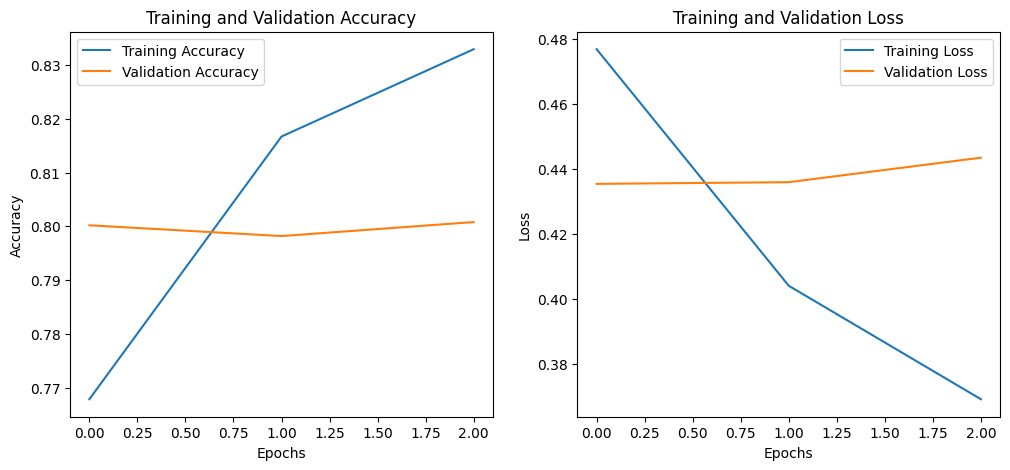

In [36]:

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [37]:
import pickle

In [ ]:
config = {
    'vocab_size': vocab_size,
    'sent_length': sent_length,
    'word_index': {}  # If using a specific word index, save it here
}

In [ ]:
with open('config_IMDB', 'wb') as f:
    pickle.dump(config, f)

In [38]:
model.save('IMDB_reviews_model.keras')

In [46]:
def predict(text):
   text = lemmatizing(text)
   onehot_rep = [one_hot(text,vocab_size)]
   embedded_docs = pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
   prediction = model.predict(embedded_docs)
   print(prediction)
   if prediction >= 0.5:
     return 'Positive'
   else:
     return 'Negative'

In [47]:
review = df.iloc[0]['text']
review

'one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experi

In [48]:
df.iloc[0]['sentiments']

1

In [49]:
predict(review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.5974208]]


'Positive'

In [50]:
review = df.iloc[500]['text']
review

'empty lack lustre rendition classic novel wish people would stop messing classic clearly idea real intention point original version different felt ralph fiennes version much worse though casting juliette brioche kathy got worst casting decision ever anyway back version aim make story relevant contemporary setting musical style succeeds high art nit throwaway viewing rainy day maybe direction average editing abysmal worse old quincy deepak verma great turn hindley fact one britain wasted talent part heath played great charm belief think casting strongest point project although talented director would made better use facility clear director hire instill project passion deserved'

In [51]:
predict(review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[[0.0050987]]


'Negative'

In [52]:
df.iloc[500]['sentiments']

0